# EDA of the Netflix Movies and TV Series Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credits.head(2)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR


In [4]:
#string columns

for i in titles.columns:
    if type(i)==str:
        print(i)

id
title
type
description
release_year
age_certification
runtime
genres
production_countries
seasons
imdb_id
imdb_score
imdb_votes
tmdb_popularity
tmdb_score


In [5]:
#number of unique actors

credits.name.value_counts().head(10)

Shah Rukh Khan           30
Anupam Kher              25
Boman Irani              25
Kareena Kapoor Khan      25
Paresh Rawal             22
Takahiro Sakurai         22
Nawazuddin Siddiqui      21
Priyanka Chopra Jonas    21
Raúl Campos              21
Jan Suter                20
Name: name, dtype: int64

In [6]:
credits.role.value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

In [7]:
credits_director = credits[credits.role=='DIRECTOR']
credits_director.head()

,person_id,id,name,character,role
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR
83,11475,tm127384,Terry Jones,NaN,DIRECTOR
84,11473,tm127384,Terry Gilliam,NaN,DIRECTOR
106,11475,tm70993,Terry Jones,NaN,DIRECTOR
148,14255,tm190788,William Friedkin,NaN,DIRECTOR


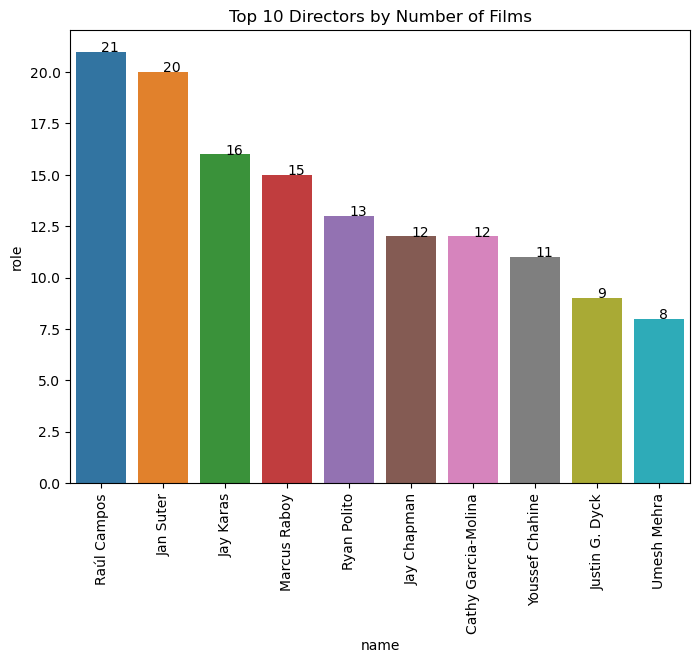

In [8]:
# Extracting top 10 directors by number of occurences
df_top10_dir = credits_director.groupby('name').count().sort_values(by='role',ascending=False).head(10)
df_top10_dir.reset_index(inplace=True)

plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=df_top10_dir['name'],y=df_top10_dir['role'])
plt.xticks(rotation=90)
plt.title('Top 10 Directors by Number of Films')

x=df_top10_dir['name']
y=df_top10_dir['role']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)
plt.show()

In [9]:
credits_actor = credits[credits.role=='ACTOR']
credits_actor.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


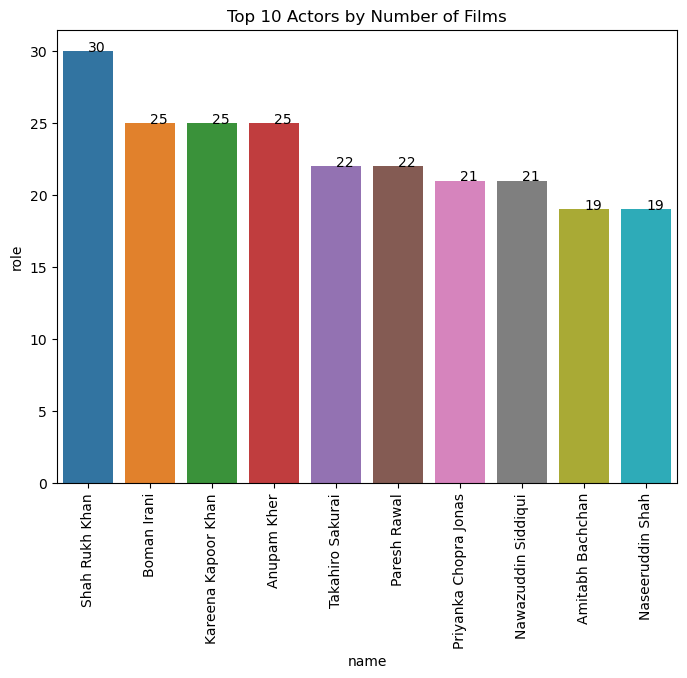

In [10]:
# Extracting top 10 actors by number of occurences

df_top10_act = credits_actor.groupby('name').count().sort_values(by='role',ascending=False).head(10)
df_top10_act.reset_index(inplace=True)

plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=df_top10_act['name'],y=df_top10_act['role'])
plt.xticks(rotation=90)
plt.title('Top 10 Actors by Number of Films')

x=df_top10_act['name']
y=df_top10_act['role']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)
plt.show()

In [11]:
df_credit_act_dir = pd.merge(credits_director,credits_actor,how='inner',on='id',suffixes=('','_y')).drop(columns=['person_id_y','role_y']).rename(columns={'name':'director_name','name_y':'actor_name','character_y':'character_name'})
df_credit_act_dir.head()

,person_id,id,director_name,character,role,actor_name,character_name
0,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,Robert De Niro,Travis Bickle
1,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,Jodie Foster,Iris Steensma
2,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,Albert Brooks,Tom
3,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,Harvey Keitel,Matthew 'Sport' Higgins
4,3308,tm84618,Martin Scorsese,NaN,DIRECTOR,Cybill Shepherd,Betsy


In [12]:
titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [13]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [14]:
titles['type'].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [15]:
titles.age_certification.value_counts().head(5)

TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
Name: age_certification, dtype: int64

Text(0.5, 1.0, 'Runtime distribution for Shows and Movies')

<Figure size 1500x625 with 0 Axes>

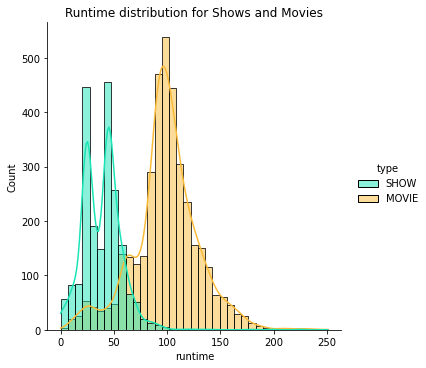

In [16]:
plt.figure(figsize=(12,5),dpi=125)
sns.displot(data=titles,x='runtime',hue='type',kde=True,palette='turbo')
plt.title('Runtime distribution for Shows and Movies')

In [17]:
# 5 Oldest Movies
df_movies=titles[titles['type']=="MOVIE"][['id','title','release_year','genres','imdb_score','imdb_votes']]
df_movies.sort_values('release_year',ascending=True).head(5)

,id,title,release_year,genres,imdb_score,imdb_votes
24,tm102287,Raya and Sakina,1953,"['drama', 'thriller', 'crime', 'history']",6.8,231.0
28,tm19608,The Blazing Sun,1954,"['romance', 'crime', 'drama']",7.4,1219.0
15,tm16479,White Christmas,1954,"['romance', 'comedy', 'music']",7.5,42373.0
22,tm204541,Dark Waters,1956,"['drama', 'action', 'romance', 'thriller']",6.7,590.0
16,tm135083,Cairo Station,1958,"['drama', 'crime', 'comedy']",7.5,4385.0


In [18]:
# 5 Oldest Shows
df_show=titles[titles['type']=="SHOW"][['id','title','release_year','genres','imdb_score','imdb_votes']]
df_show.sort_values('release_year',ascending=True).head(5)

,id,title,release_year,genres,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,1945,['documentation'],NaN,NaN
5,ts22164,Monty Python's Flying Circus,1969,"['comedy', 'european']",8.8,72895.0
29,ts45948,Monty Python's Fliegender Zirkus,1972,['comedy'],8.1,2144.0
67,ts987,Danger Mouse,1981,"['comedy', 'family', 'scifi', 'animation', 'eu...",7.4,3514.0
55,ts22082,Knight Rider,1982,"['action', 'scifi', 'crime', 'drama']",6.9,33760.0


In [19]:
#5 Newest Movies

df_movies=titles[titles['type']=="MOVIE"][['id','title','release_year','genres','imdb_score','imdb_votes']]
df_movies.sort_values('release_year',ascending=False).head(5)

,id,title,release_year,genres,imdb_score,imdb_votes
5099,tm1146393,All Hail,2022,"['comedy', 'drama']",5.6,2840.0
5706,tm1159298,Erax,2022,"['family', 'thriller']",NaN,NaN
5631,tm1164320,Behind the Scenes With Jane Campion,2022,['documentation'],NaN,NaN
5086,tm1165219,Ali Wong: Don Wong,2022,['comedy'],6.5,1828.0
5091,tm1138870,Badhaai Do,2022,"['comedy', 'drama', 'crime']",7.3,15032.0


In [20]:
#5 Newest Shows

df_show=titles[titles['type']=="SHOW"][['id','title','release_year','genres','imdb_score','imdb_votes']]
df_show.sort_values('release_year',ascending=False).head(5)

,id,title,release_year,genres,imdb_score,imdb_votes
4839,ts225061,Pieces of Her,2022,"['crime', 'drama', 'thriller']",6.4,11322.0
5391,ts321437,Fishbowl Wives,2022,"['drama', 'romance']",6.1,704.0
5059,ts296563,Who Rules The World,2022,"['drama', 'fantasy', 'romance']",9.2,81.0
5398,ts329711,"Love, Life & Everything in Between",2022,"['drama', 'comedy', 'romance']",5.3,65.0
5058,ts329885,Standing Up,2022,"['comedy', 'drama']",6.2,133.0


Correlation between IMDB score and Votes:  0.18995424636958202


Text(0.5, 1.0, 'Correlation between IMDB score and IMDB votes')

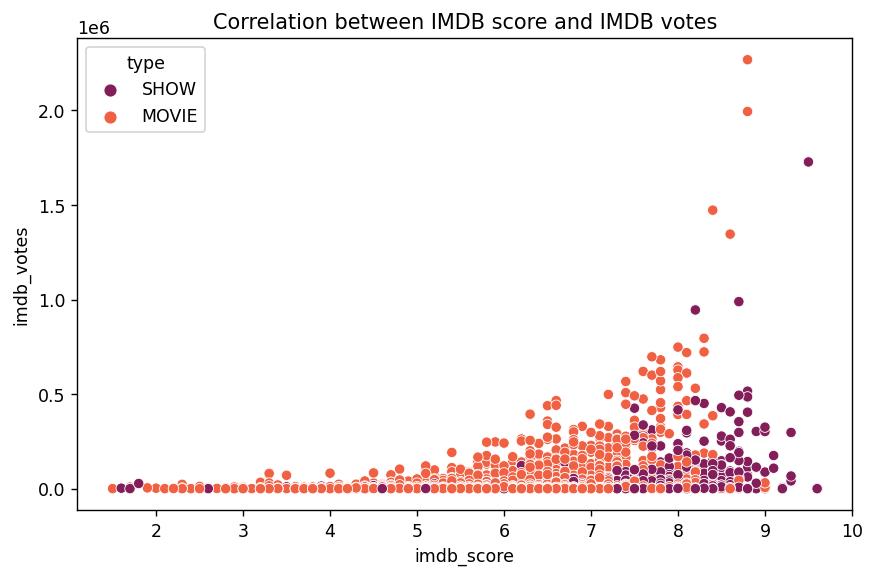

In [21]:
#Correlation between IMDB votes and IMDB score
print("Correlation between IMDB score and Votes: ",titles['imdb_score'].corr(titles['imdb_votes']))

plt.figure(figsize=(8,5),dpi=125)
sns.scatterplot(data=titles,x='imdb_score',y='imdb_votes',hue='type',palette='rocket')
plt.title("Correlation between IMDB score and IMDB votes")

Correlation between TMDB score and Votes:  0.0684050122700327


Text(0.5, 1.0, 'Correlation between TMDB score and TMDB Popularity')

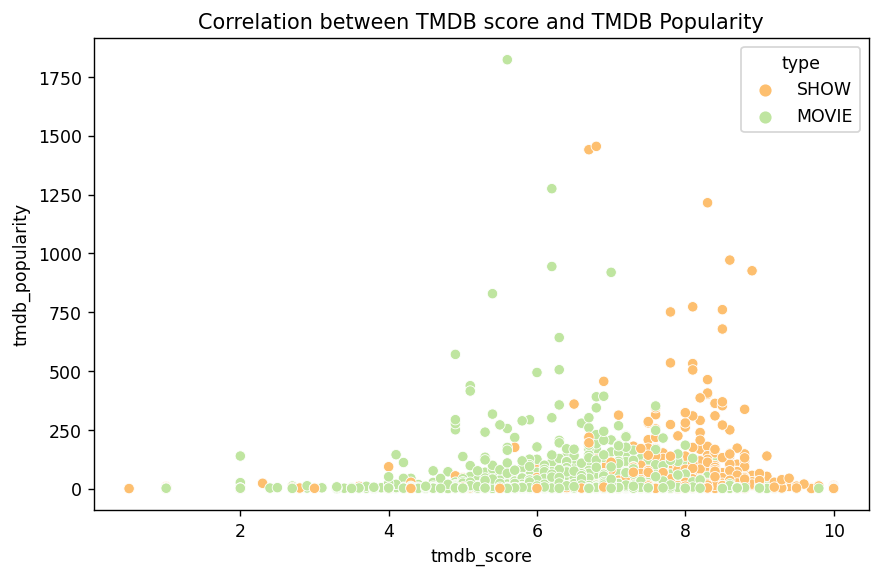

In [22]:
#Correlation between TMDB votes and TMDB score
print("Correlation between TMDB score and Votes: ",titles['tmdb_score'].corr(titles['tmdb_popularity']))

plt.figure(figsize=(8,5),dpi=125)
sns.scatterplot(data=titles,x='tmdb_score',y='tmdb_popularity',hue='type',palette='Spectral')
plt.title("Correlation between TMDB score and TMDB Popularity")

Text(0.5, 1.0, 'Correlation between Titles numerical columns')

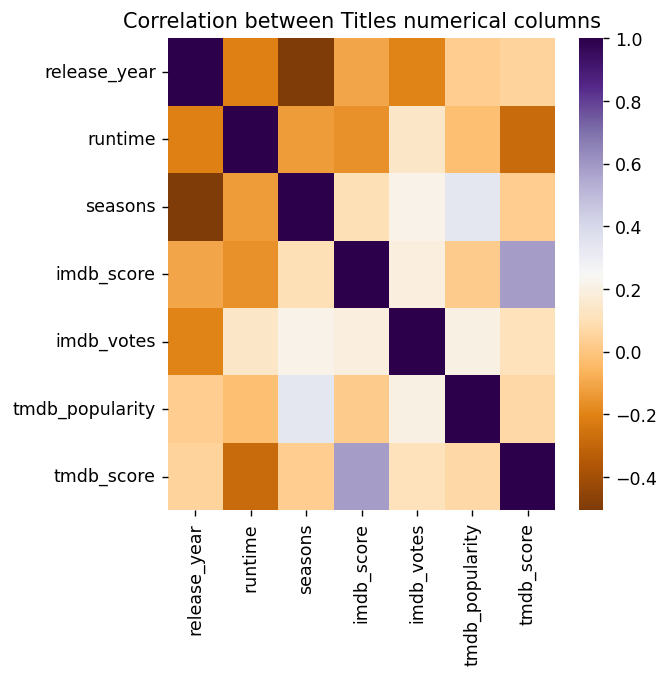

In [23]:
plt.figure(figsize=(5,5),dpi=125)
sns.heatmap(titles.corr(),cmap='PuOr')
plt.title("Correlation between Titles numerical columns")

In [24]:
titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


Text(0.5, 1.0, 'IMDB Score distribution by Type')

<Figure size 625x625 with 0 Axes>

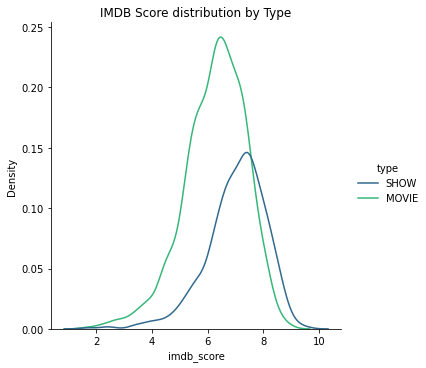

In [25]:
plt.figure(figsize=(5,5),dpi=125)
sns.displot(data=titles,x='imdb_score',kind='kde',hue='type',palette='viridis')
plt.title("IMDB Score distribution by Type")

In [26]:
#Directors of top 5 shows (by IMDB score)

df_shows_top5 = df_show.sort_values(by='imdb_score',ascending=False).head(5)
pd.merge(df_shows_top5,credits_director,how='left',on='id')[['title','release_year','genres','imdb_score','name']]

,title,release_year,genres,imdb_score,name
0,#ABtalks,2018,[],9.6,NaN
1,Khawatir,2005,['reality'],9.6,NaN
2,Breaking Bad,2008,"['drama', 'thriller', 'crime']",9.5,NaN
3,Avatar: The Last Airbender,2005,"['scifi', 'family', 'fantasy', 'animation', 'a...",9.3,NaN
4,Kota Factory,2019,"['drama', 'comedy']",9.3,NaN


In [27]:
#Directors of top 5 movies (by IMDB Score)

df_movies_top5 = df_movies.sort_values(by='imdb_score',ascending=False).head(5)
pd.merge(df_movies_top5,credits_director,how='left',on='id')[['title','release_year','genres','imdb_score','name']]

,title,release_year,genres,imdb_score,name
0,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,Keith Scholey
1,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,Jonathan Hughes
2,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,Alastair Fothergill
3,C/o Kancharapalem,2018,['drama'],9.0,Venkatesh Maha
4,No Longer Kids,1979,"['comedy', 'drama']",9.0,Samir Al Asfory
5,Chhota Bheem & Krishna in Mayanagari,2011,"['animation', 'action', 'fantasy']",9.0,NaN
6,Inception,2010,"['scifi', 'music', 'thriller', 'action']",8.8,Christopher Nolan


In [28]:
# Actors of top 5 Films

pd.options.display.max_rows = 120
df_movies_top5 = df_movies.sort_values(by='imdb_score',ascending=False).head(5)
pd.merge(df_movies_top5,credits_actor,how='left',on='id')[['title','release_year','genres','imdb_score','name']]

,title,release_year,genres,imdb_score,name
0,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,David Attenborough
1,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,Max Hughes
2,C/o Kancharapalem,2018,['drama'],9.0,Mohan Bhagath
3,C/o Kancharapalem,2018,['drama'],9.0,Praveena Paruchuri
4,C/o Kancharapalem,2018,['drama'],9.0,Karthik Rathnam
5,C/o Kancharapalem,2018,['drama'],9.0,Radha Bessy
6,C/o Kancharapalem,2018,['drama'],9.0,Praneeta Patnaik
7,C/o Kancharapalem,2018,['drama'],9.0,Nithya Sree
8,C/o Kancharapalem,2018,['drama'],9.0,Kesava Karri
9,C/o Kancharapalem,2018,['drama'],9.0,Kishore Kumar Polimera


In [29]:
# Actors of top 5 shows

df_shows_top5 = df_movies.sort_values(by='imdb_score',ascending=False).head(5)
pd.merge(df_shows_top5,credits_actor,how='left',on='id')[['title','release_year','genres','imdb_score','name']]

,title,release_year,genres,imdb_score,name
0,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,David Attenborough
1,David Attenborough: A Life on Our Planet,2020,['documentation'],9.0,Max Hughes
2,C/o Kancharapalem,2018,['drama'],9.0,Mohan Bhagath
3,C/o Kancharapalem,2018,['drama'],9.0,Praveena Paruchuri
4,C/o Kancharapalem,2018,['drama'],9.0,Karthik Rathnam
5,C/o Kancharapalem,2018,['drama'],9.0,Radha Bessy
6,C/o Kancharapalem,2018,['drama'],9.0,Praneeta Patnaik
7,C/o Kancharapalem,2018,['drama'],9.0,Nithya Sree
8,C/o Kancharapalem,2018,['drama'],9.0,Kesava Karri
9,C/o Kancharapalem,2018,['drama'],9.0,Kishore Kumar Polimera
